In [2]:
# MNIST=> Modified National Institute of Standards and Technology database
# www.keras.io/api/datasets/mnist/
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
# DL libraries
import tensorflow as tf
# A random seed is used to ensure that results are reproducible. In other words, using this parameter makes sure that anyone who re-runs your code will get the exact same outputs. Reproducibility is an extremely important concept in data science and other fields.
tf.random.set_seed(3)
# keras helps in creating neural networking.
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
# Loading the MNIST data from keras.datasets
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()
type(X_train)



11490434/11490434 [==============================] - 1s 0us/step


numpy.ndarray

In [4]:
#shape fo the numpy arrays
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
  # training data=60,000 images
  # test data= 10000 images
  # Image dimension-> 28 x 28
  # grayscale image-> 1 channel

In [6]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape)

(28, 28)


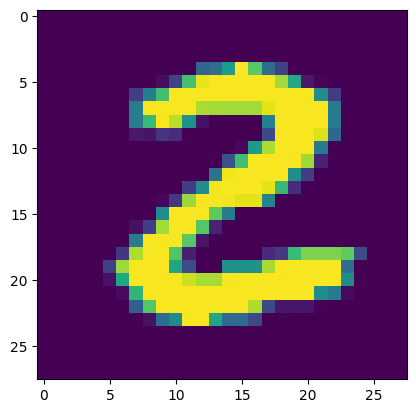

2


In [8]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [9]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [10]:
# unique value in Y_train
print(np.unique(Y_train))

# unique calues in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
# We can use these labels as such or we can also apply One Hot Encoding
# All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension



In [12]:
# scaling images

X_train=X_train/225
X_test= X_test/225

In [13]:
# print the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
# building the neural network

# setting up the layers of the neural network
# 3 is used here to flatten up and let the system know that the images are rgb
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        # here below 10 stands for the no. of classes we have in the label.
                        keras.layers.Dense(10,activation='sigmoid')
                        ])

In [15]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2890 - accuracy: 0.9164
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1358 - accuracy: 0.9593
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1010 - accuracy: 0.9698
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0822 - accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0673 - accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0577 - accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0489 - accuracy: 0.9844
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0430 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0388 - accuracy: 0.9875
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.032

In [17]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1092 - accuracy: 0.9739
0.9739000201225281


In [18]:
print(X_test.shape)

(10000, 28, 28)


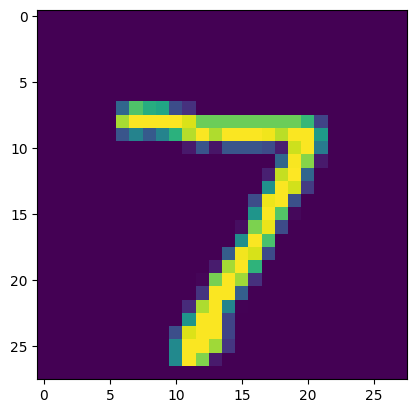

In [19]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [20]:
print(Y_test[0])

7


In [21]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [22]:
print(Y_pred.shape)

(10000, 10)


In [23]:
print(Y_pred[0])

[1.2063807e-02 2.0577233e-01 1.9001114e-01 8.5159928e-01 1.7530851e-03
 9.1830257e-04 1.0901364e-05 9.9999803e-01 5.1583421e-01 6.7825907e-01]


In [24]:
# model.precict() gives the prediction probability of each class for that data point

# converting the prediction probabilities to class label

label_for_first_image=np.argmax([Y_pred[0]])
print(label_for_first_image)

7


In [25]:
 # converting the prediction probabilities to class label for all test data points

 Y_pred_labels=[np.argmax(i) for i in Y_pred]
 print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 8, 4, 2, 0, 7, 1, 1, 2, 1, 

In [26]:
print(Y_pred)

[[1.2063807e-02 2.0577233e-01 1.9001114e-01 ... 9.9999803e-01
  5.1583421e-01 6.7825907e-01]
 [4.9574355e-05 9.9721980e-01 1.0000000e+00 ... 2.3047531e-09
  5.3600854e-01 2.7334195e-09]
 [3.5249843e-04 9.9995708e-01 2.6968434e-02 ... 7.3852575e-01
  4.7710788e-01 3.6511564e-04]
 ...
 [4.1843133e-04 5.8285434e-02 2.1636874e-12 ... 2.7355922e-02
  4.4263873e-02 4.3479264e-01]
 [5.6182703e-09 6.5887070e-05 9.2291227e-12 ... 1.3411620e-05
  4.3197677e-02 7.9968487e-07]
 [8.0825185e-04 7.3034328e-04 9.4849529e-04 ... 1.1574386e-08
  3.3174891e-02 8.3342547e-07]]


In [28]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)

In [30]:
print(conf_mat)

tf.Tensor(
[[ 961    0    2    1    1    2    5    0    7    1]
 [   0 1126    3    0    0    1    2    1    2    0]
 [   3    1 1002    4    4    1    4    3   10    0]
 [   0    0    8  979    0    2    0    4   15    2]
 [   2    0    1    0  977    0    1    0    0    1]
 [   2    1    0    9    1  854    6    1   12    6]
 [   2    1    2    1    6    3  938    0    5    0]
 [   1    6   10    3    3    2    0  991    4    8]
 [   0    0    2    5    5    6    0    5  948    3]
 [   4    2    0    6   20    3    0    5    6  963]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

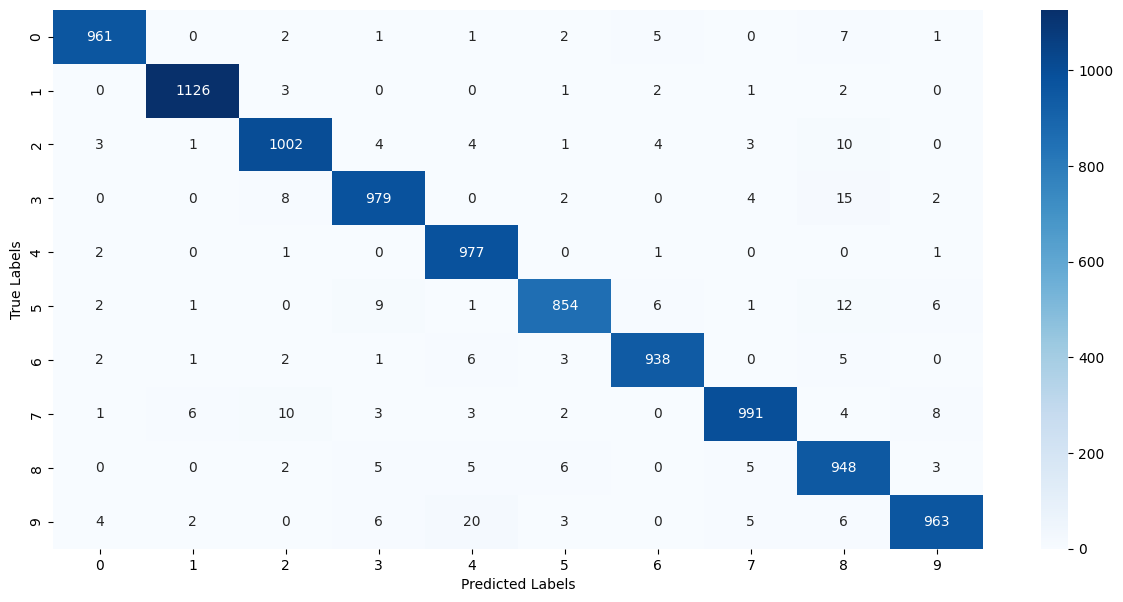

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [33]:
#Building the Neural Network

input_image_path='/content/MNIST_digit.png'

input_image=cv2.imread(input_image_path)

In [34]:
type(input_image)

numpy.ndarray

In [35]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


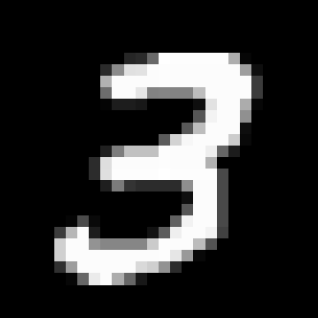

In [36]:
cv2_imshow(input_image)

In [37]:
input_image.shape

(318, 318, 3)

In [40]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [41]:
grayscale.shape

(318, 318)

In [42]:
input_image_resize=cv2.resize(grayscale,(28,28))
input_image_resize.shape

(28, 28)

In [43]:
cv2_imshow(input_image_resize )

In [44]:
input_image_resize = input_image_resize/255

In [45]:
type(input_image_resize)

numpy.ndarray

In [46]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [49]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 63ms/step
[[9.9995316e-07 1.9937499e-01 1.9084958e-04 1.0000000e+00 5.8351712e-13
  5.1021755e-01 4.8139363e-13 7.8992678e-05 4.5467275e-01 8.4889865e-01]]


In [50]:
input_pred_label = np.argmax(input_prediction)

In [51]:
print(input_pred_label)

3


Path of the image to be predicted: /content/MNIST_digit.png


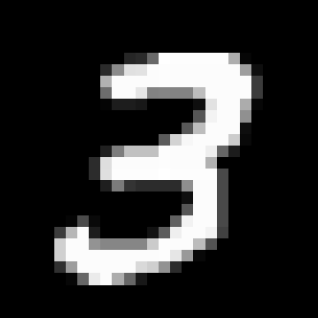

1/1 [==============================] - 0s 22ms/step
The Handwritten Digit is recognised as  3


In [55]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)